In [44]:
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv("./diabetes_prediction_dataset.csv")
df.shape

(100000, 9)

In [46]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [47]:
df = pd.get_dummies(df, columns=["gender", "smoking_history"], drop_first=True)

In [48]:
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,False,False,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,0,False,False,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,0,True,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,0,False,False,False,False,False,True,False


In [49]:
X = df.drop(columns=["diabetes"])
y = df["diabetes"]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
import tensorflow
from tensorflow import keras
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense

In [53]:
model = Sequential()

model.add(Dense(3, activation="relu", input_dim=13))
model.add(Dense(3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 3)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 4         
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [56]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2479 - accuracy: 0.9097 - val_loss: 0.1521 - val_accuracy: 0.9164
Epoch 2/10
2000/2000 [==============================] - 3s 1ms/step - loss: 0.1467 - accuracy: 0.9327 - val_loss: 0.1382 - val_accuracy: 0.9591
Epoch 3/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1366 - accuracy: 0.9587 - val_loss: 0.1310 - val_accuracy: 0.9592
Epoch 4/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1311 - accuracy: 0.9589 - val_loss: 0.1268 - val_accuracy: 0.9603
Epoch 5/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1279 - accuracy: 0.9591 - val_loss: 0.1253 - val_accuracy: 0.9597
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1256 - accuracy: 0.9594 - val_loss: 0.1224 - val_accuracy: 0.9604
Epoch 7/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1237 - accuracy: 0.9595 - val_loss: 0.1210 - val_accuracy:

In [57]:
y_log = model.predict(X_test_scaled)

In [58]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.95995

In [60]:
import matplotlib.pyplot as plt

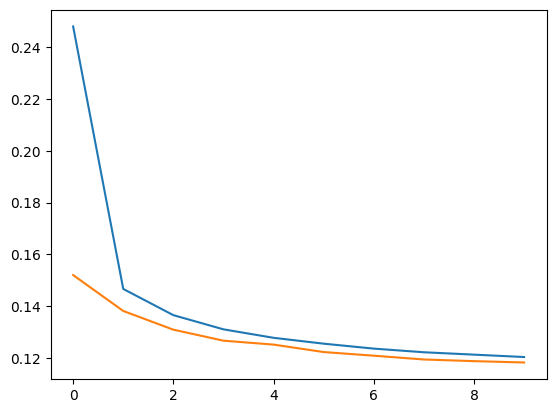

In [61]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

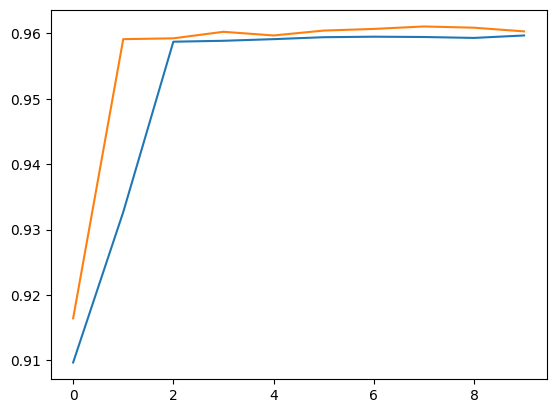

In [62]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])